In [1]:
import pandas as pd
data = pd.read_csv("zomato_data.csv")

In [2]:
data.head()


,Unnamed: 0,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,0,The Salt Cafe Kitchen & Bar,1000,"North Indian,Continental,Italian",Agra,Tajganj,https://www.zomato.com/agra/the-salt-cafe-kitc...,1,Casual Dining,1130am to 1130pm(Mon-Sun),Excellent,4.8,273
1,1,Bhagat Halwai,300,"Desserts,Bakery,Fast Food,South Indian",Agra,Civil Lines,https://www.zomato.com/agra/bhagat-halwai-civi...,1,Quick Bites,730am to 11pm(Mon-Sun),Very Good,4.3,554
2,2,Bikanervala,700,"North Indian,South Indian,Mithai,Street Food,D...",Agra,Khandari,https://www.zomato.com/agra/bikanervala-khanda...,1,Quick Bites,8am to 11pm(Mon-Sun),Very Good,4.4,645
3,3,Mama Chicken Mama Franky House,600,"North Indian,Mughlai,Rolls,Chinese,Fast Food,S...",Agra,Agra Cantt,https://www.zomato.com/agra/mama-chicken-mama-...,1,Quick Bites,"1230pm to 12midnight(Mon,Wed,Thu,Fri,Sat...",Very Good,4.3,894
4,4,Honeydew Restaurant,500,"North Indian,Fast Food,Chinese,South Indian",Agra,Dayal Bagh,https://www.zomato.com/agra/honeydew-restauran...,1,Quick Bites,"11am to 1035pm(Mon,Tue,Wed,Fri,Sat),11am to ...",Very Good,4.1,489


In [3]:
price = list(data["PRICE"])

PRICE column

In [5]:
import numpy as np
print("The number of samples in price population",len(price))
print("The max value in price population",max(price))
print("The min value in price population",min(price))
print("The mean of samples in price population",np.mean(price))
print("The standard deviation of samples in price population",np.std(price))
print("The Median of samples in price population",np.median(price))

The number of samples in price population 105623
The max value in price population 6000
The min value in price population 0
The mean of samples in price population 416.9548299139392
The standard deviation of samples in price population 271.2626996065808
The Median of samples in price population 350.0


### population parameters

In [6]:
import numpy as np
pop_mean = np.mean(price)
pop_std = np.std(price)
print("The mean of the population of the price column",pop_mean)
print("The std of the population of the price column",pop_std)

The mean of the population of the price column 416.9548299139392
The std of the population of the price column 271.2626996065808


### Stimulation of the central limit theorem

In [7]:
from random import sample
from math import sqrt

In [8]:
def report(no_of_sample,no_of_repetation,mean_iteration,pop_mean,pop_std):
    """
    It prints how CLT stimulated parameters from original data
    """
    print("No of sample taken",no_of_sample)
    print("No of repetation taken",no_of_repetation)
    print("The population mean",pop_mean)
    print("The mean of mean of the sample",np.mean(mean_iteration))
    print("The deviation of mean",abs(pop_mean-np.mean(mean_iteration)))
    print("The Expected stdev from CLT",pop_std/sqrt(no_of_sample))
    print("The stdev of mean of the sample",np.std(mean_iteration))
    print("The deviation of stdev",abs(pop_std/sqrt(no_of_sample)-np.std(mean_iteration)))

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def CLT(no_of_sample,no_of_repetation):
    """
    It samples data from original data according to the paramters and than plot PDF of means of the sample
    """
    mean_iteration = []
    for iteration in range(no_of_repetation):
        sample_set = sample(price,no_of_sample)
        mean_iteration.append(np.mean(sample_set))
    mean_sample = pd.Series(mean_iteration)
    counts,bin_edges = np.histogram(mean_sample,bins = 10,density = True)
    pdf = counts/(sum(counts))
    plt.plot(bin_edges[1:],pdf)
    plt.title("pdf of the means of the sample")
    plt.xlabel("mean")
    plt.ylabel("probaility")
    plt.show()
    print("Note about the exercise")
    report(no_of_sample,no_of_repetation,mean_iteration,pop_mean,pop_std)

Enter the no of sample to choose100
Enter the no of time process to be repeated500


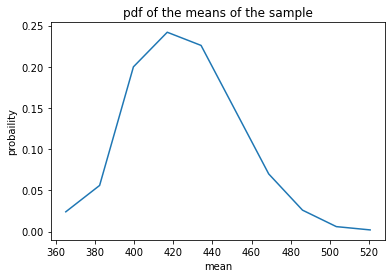

Note about the exercise
No of sample taken 100
No of repetation taken 500
The population mean 416.9548299139392
The mean of mean of the sample 416.6565
The deviation of mean 0.29832991393919883
The Expected stdev from CLT 27.126269960658078
The stdev of mean of the sample 26.718991372243075
The deviation of stdev 0.40727858841500364


In [10]:
no_of_sample = int(input("Enter the no of sample to choose"))
no_of_repetation = int(input("Enter the no of time process to be repeated"))
CLT(no_of_sample,no_of_repetation)